In [1]:
#Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score


In [2]:
#Loading the dataset
df = pd.read_csv('bank-additional-full.csv', sep=";", quotechar='"')

# Preprocessing the data
# Replacing 'unknown' values with NaN
df.replace('unknown', np.nan, inplace=True)

#Renaming the columns because they have double quotation marks
df = df.rename(columns={'"job"': 'job', '"education"': 'education', '"default"': 'default'})

# Handling missing values
# job, education and default columns have missing values
# Filling missing values with mode
for col in ['job', 'education', 'default']:
    df[col].fillna(df[col].mode()[0], inplace=True)



In [3]:
# Hot encoding the categorical columns
df = pd.get_dummies(df, columns=['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome'], drop_first=True)

In [4]:
# Target variable
y = df['y']

In [5]:
# Features
X = df.drop('y', axis=1)

In [6]:
# Splitting data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [7]:
# Initializing the MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=100, random_state=0)

In [8]:
# Fitting the model on the training set
mlp.fit(X_train, y_train)

MLPClassifier(max_iter=100, random_state=0)

In [9]:
# Predicting on the test set
y_pred = mlp.predict(X_test)

In [10]:
# Accuracy of the model
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy of the model: {acc*100:.2f}%")

Accuracy of the model: 90.84%


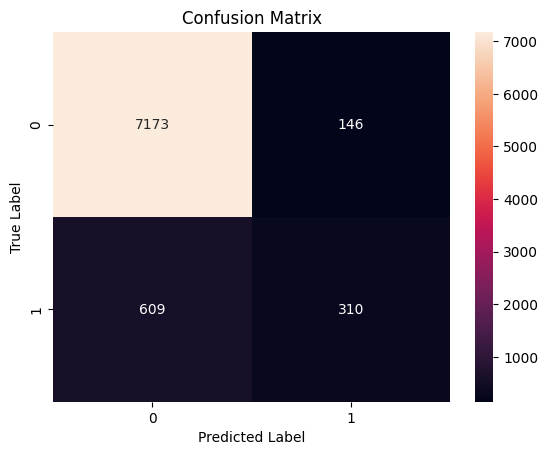

In [11]:
# Visualizing the performance of the model
# Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

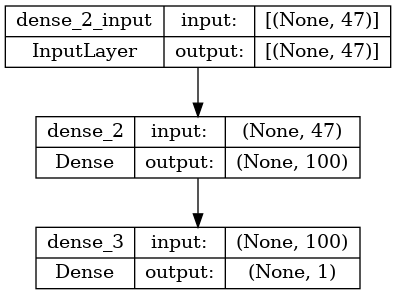

In [13]:
# Plotting the network architecture
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import plot_model

# Initializing the model
model = Sequential()

# Adding the input layer and the first hidden layer
model.add(Dense(units=100, activation='relu', input_dim=X_train.shape[1]))

# Adding the output layer
model.add(Dense(units=1, activation='sigmoid'))

# Compiling the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Plotting the network architecture
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)
